In [82]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
def f(x):
    return 3 * x**2 - 4*x + 5

In [84]:
f(3.0)

20.0

In [85]:
xs = np.arange(-5, 5, .25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [86]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

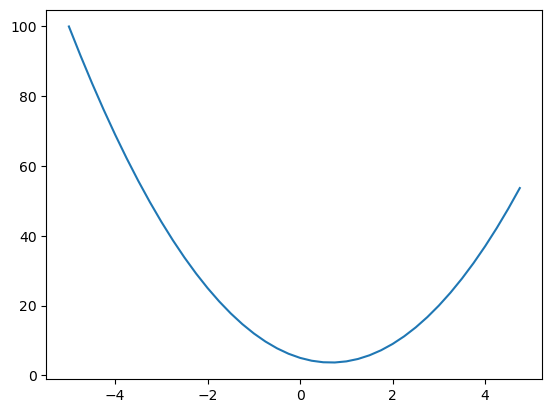

In [87]:
plt.plot(xs, ys)

In [88]:
h = 0.00000000000001
n = 3.0 
print(f(n))
print(f(n + h))
print((f(n + h) - f(n))/h)

20.0
20.000000000000142
14.210854715202004


In [89]:
n = 1.0
print((f(n + h) - f(n))/h)

1.9539925233402755


In [90]:
n = -3
print((f(n + h) - f(n))/h)

-22.737367544323206


In [91]:
n = 2/3
print((f(n + h) - f(n))/h)

0.0


In [92]:
# lets get more complex

a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)


4.0


In [93]:
h = 0.00000000000001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
d2 = (a + h) * b + c

print('d1',d1)
print('d2', d2)
print('slope', (d2-d1)/h)


d1 4.0
d2 3.99999999999997
slope -3.019806626980426


In [94]:
d1 = a * b + c
d2 = a * (b + h) + c

print('d1',d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.00000000000002
slope 2.042810365310288


In [95]:
d1 = a * b + c
d2 = a * b + (c + h)

print('d1',d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.000000000000011
slope 1.0658141036401503


In [96]:
import math
class Value:
    def __init__(self, data, _children=(), _op='', label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self * other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return self * other**-1
    
    
    def __rtruediv__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        return other / self

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f"**{other}")

        def _backward():
            self.grad += other * (self.data ** (other-1)) * out.grad
        out._backward = _backward
        return out
    
    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)
    
    def __rsub__(self, other):
        return Value(other) - self

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')

        def _backward():
            # refer to Calculation of do/dn
            # Part 2
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out



a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = "L"
L

Value(data=-8.0)

In [97]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [98]:
d._op

'+'

In [99]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [100]:
from graphviz import Digraph
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f } " % (n.label, n.data, n.grad), shape="record")
        # and connect this node to it
        if n._op:
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

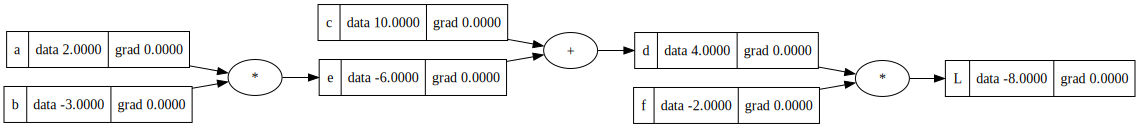

In [101]:
draw_dot(L)

In [102]:
def lol():
    h = 0.000000001


    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L2 = L.data + h

    print((L2 - L1)/h)
    
lol()

1.000000082740371


In [103]:
def get_grad(var):
    h = 0.000000001

    add_a = 0
    add_b = 0
    add_c = 0
    add_d = 0
    add_e = 0
    add_f = 0
    add_L = 0

    if var == 'a':
        add_a = h
    elif var == 'b':
        add_b = h
    elif var == 'c':
        add_c = h
    elif var == 'd':
        add_d = h
    elif var == 'e':
        add_e = h
    elif var == 'f':
        add_f = h
    elif var == 'L':
        add_L = h

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c")
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0 + add_a, label="a")
    b = Value(-3.0 + add_b, label="b")
    c = Value(10.0 + add_c, label="c")
    e = a * b; e.label = 'e'
    e.data += add_e
    d = e + c; d.label = 'd'
    d.data += add_d
    f = Value(-2.0, label='f')
    f.data += add_f
    L = d * f; L.label = "L"
    L.data += add_L
    L2 = L.data

    return (L2 - L1)/h

In [104]:
print(get_grad('L'))

1.000000082740371


In [105]:
L.grad = get_grad('L')
a.grad = get_grad('a')
b.grad = get_grad('b')
c.grad = get_grad('c')
d.grad = get_grad('d')
e.grad = get_grad('e')
f.grad = get_grad('f')

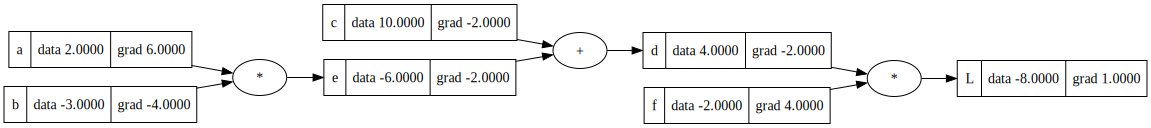

In [106]:
draw_dot(L)

### Calculation of dL/dd 

L = d * f

dL/dd = ? // f

(f(x+h)-f(x))/h

((d+h)*f - d*f)/h

(d*f + h*f - d*f)/h

(h*f)/h

f

### Calculation of dL/dc
d = c + e

dd/dc = dc/dc + de/dc

dd/dc = 1 + 0

dd/dc = 1

L = d * f

dL/dd = f

dL/dc * dc/dd = f

dL/dc * 1 = f

dL/dc = f

### Calculation of dL/da

e = a * b

de/da = b

d = c + e

dd/de = 1

L = d * f

dL/dd = f

dL/de * de/dd = f

dL/de * 1 = f

dL/de = f

dL/da * da/de = f

dL/da * 1/b = f

dL/da = f * b

dL/da = -2 * -3 = 6

### Calculation of dL/db

e = a * b

de/db = a

dL/de = f

dL/db * db/de = f

dL/db = f * a

dL/db = -2 * 2 = -4

In [107]:
# if we increase values in the direction of gradient then the value will go up

a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.2864959415098385


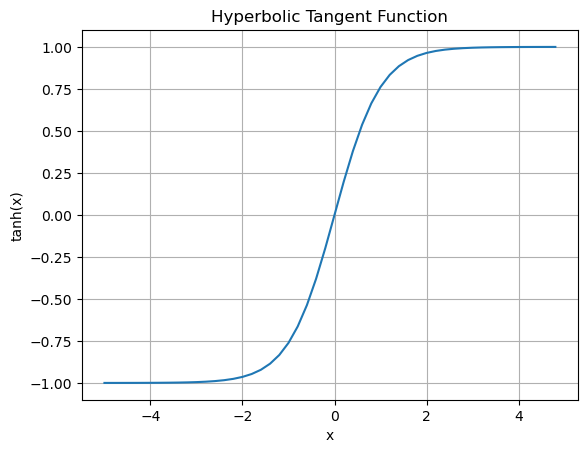

In [108]:

n = np.arange(-5, 5, 0.2)
y = np.tanh(n)

plt.plot(n, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Hyperbolic Tangent Function')
plt.show()

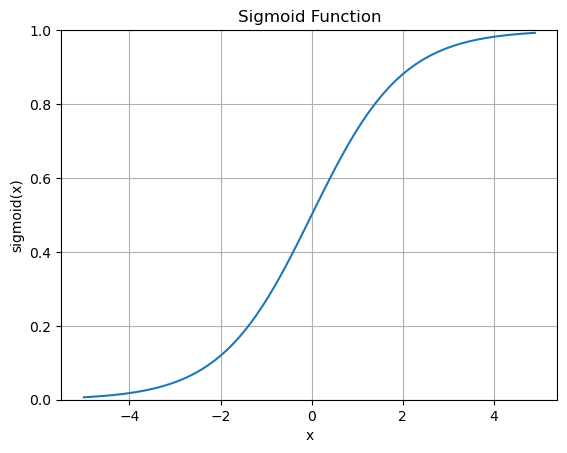

In [109]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

n = np.arange(-5, 5, 0.1)
y = sigmoid(n)

plt.plot(n, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.ylim(0, 1)  # Set y-axis limits for the sigmoid's range
plt.show()

In [110]:
def build_graph():
    # inputs x1, x2
    x1 = Value(2.0, label='x1')
    x2 = Value(0.0, label='x2')
    # weights w1, w2
    w1 = Value(-3.0, label='w1')
    w2 = Value(1.0, label='w2')
    # bias of the neuron
    b = Value(6.8813735870195432, label='b')

    # x1*w1 + x2*w2 + b

    x1w1 = x1*w1
    x1w1.label = 'x1*w1'
    x2w2 = x2*w2
    x2w2.label = 'x2*w2'
    x1w1x2w2 = x1w1 + x2w2
    x1w1x2w2.label = 'x1*w1 + x2*w2'
    n = x1w1x2w2 + b
    n.label = 'n'
    o = n.tanh(); o.label = 'o'
    return o

o = build_graph()

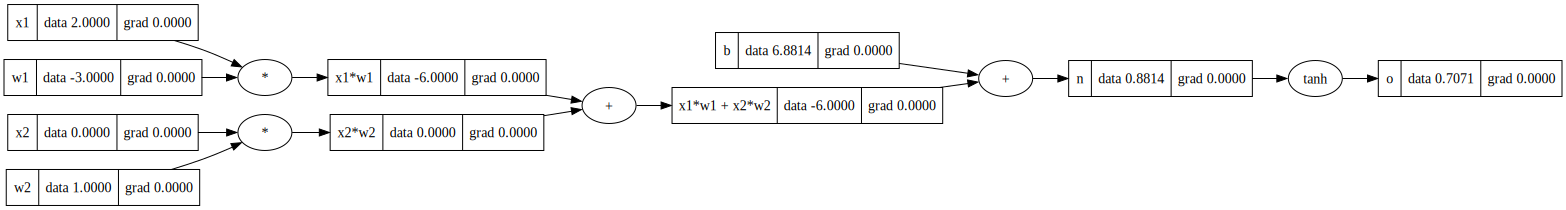

In [111]:
draw_dot(o)

In [112]:
def get_grad(var):
    h = 0.000000001

    add_o = 0
    add_n = 0
    add_b = 0
    add_w1 = 0
    add_w2 = 0
    add_x1w1x2w2 = 0
    add_x1w1 = 0
    add_x2w2 = 0
    add_x1 = 0
    add_x2 = 0

    if var == 'o':
        add_o = h
    elif var == 'n':
        add_n = h
    elif var == 'b':
        add_b = h
    elif var == 'w1':
        add_w1 = h
    elif var == 'w2':
        add_w2 = h
    elif var == 'x1w1x2w2':
        add_x1w1x2w2 = h
    elif var == 'x1w1':
        add_x1w1 = h
    elif var == 'x2w2':
        add_x2w2 = h
    elif var == 'x1':
        add_x1 = h
    elif var == 'x2':
        add_x2 = h

    # inputs x1, x2
    x1 = Value(2.0, label='x1')
    x2 = Value(0.0, label='x2')
    # weights w1, w2
    w1 = Value(-3.0, label='w1')
    w2 = Value(1.0, label='w2')
    # bias of the neuron
    b = Value(6.8813735870195432, label='b')

    # x1*w1 + x2*w2 + b

    x1w1 = x1*w1
    x1w1.label = 'x1*w1'
    x2w2 = x2*w2
    x2w2.label = 'x2*w2'
    x1w1x2w2 = x1w1 + x2w2
    x1w1x2w2.label = 'x1*w1 + x2*w2'
    n = x1w1x2w2 + b
    n.label = 'n'
    o = n.tanh(); o.label = 'o'
    o1 = o.data

    # inputs x1, x2
    x1 = Value(2.0, label='x1')
    x1.data += add_x1
    x2 = Value(0.0, label='x2')
    x2.data += add_x2
    # weights w1, w2
    w1 = Value(-3.0, label='w1')
    w1.data += add_w1
    w2 = Value(1.0, label='w2')
    w2.data += add_w2
    # bias of the neuron
    b = Value(6.8813735870195432, label='b')
    b.data += add_b
    # x1*w1 + x2*w2 + b

    x1w1 = x1*w1
    x1w1.label = 'x1*w1'
    x1w1.data += add_x1w1
    x2w2 = x2*w2
    x2w2.label = 'x2*w2'
    x2w2.data += add_x2w2
    x1w1x2w2 = x1w1 + x2w2
    x1w1x2w2.label = 'x1*w1 + x2*w2'
    x1w1x2w2.data += add_x1w1x2w2
    n = x1w1x2w2 + b
    n.data += add_n
    n.label = 'n'
    o = n.tanh(); o.label = 'o'
    o.data += add_o
    o2 = o.data

    return (o2 - o1)/h

In [113]:
o = build_graph()

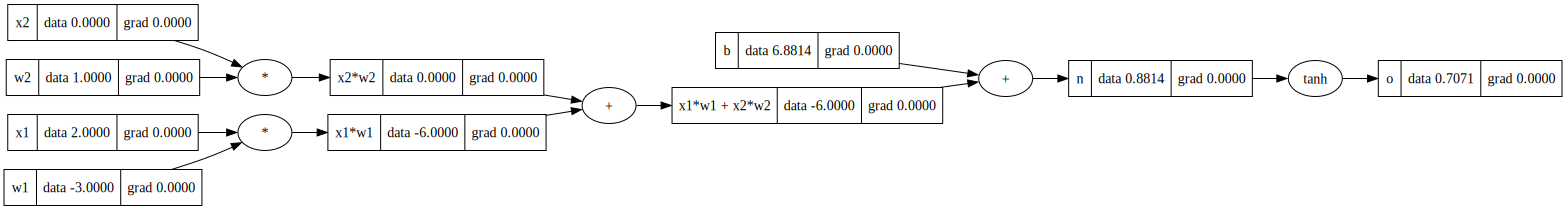

In [114]:
draw_dot(o)

### Calculation of do/dn

o = tanh(n)

do/dn = 1 - tanh(n)**2

      = 1 - o**2

      = 1 - (0.7071)**2


### Part 2

do/dn = 1 - tanh(n)**2

1/dn = (1 - tanh(n)**2) * 1/do

// multiply both sides with do

do/dn = (1 - tanh(n)**2) * do/do



In [115]:
print(1 - (0.7071)**2)

0.5000095900000001


results used

x2.grad = w2.data * x2w2.grad

w2.grad = x2.data * x2w2.grad

### Proof

x2 * w2 = x2w2

dx2/dx2 * w2 + x2 * dw2/dx2 = dx2w2/dx2

1 * w2 + x2 * 0 = dx2w2/dx2

w2 = dx2w2/dx2

w2 / dx2w2 = 1 / dx2 

w2 * 1 / dx2w2 = 1 / dx2 * do/do

w2 * do / dx2w2 = do / dx2

w2 * x2w2.grad = x2.grad

In [116]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b

x1w1 = x1*w1
x1w1.label = 'x1*w1'
x2w2 = x2*w2
x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b
n.label = 'n'
o = n.tanh(); o.label = 'o'

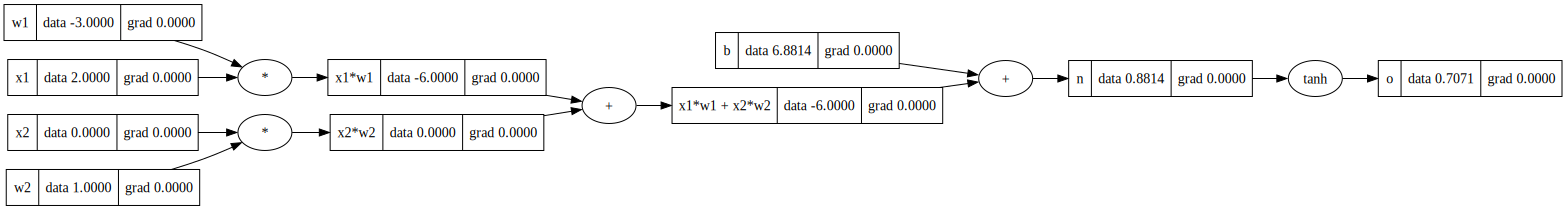

In [117]:
draw_dot(o)

In [118]:
o.grad = 1.0

In [119]:
o._backward()

In [120]:
n._backward()

In [121]:
b._backward() # no effect though as it's a leaf, so lambda:None will is called

In [122]:
x1w1x2w2._backward()

In [123]:
x1w1._backward()

In [124]:
x2w2._backward()

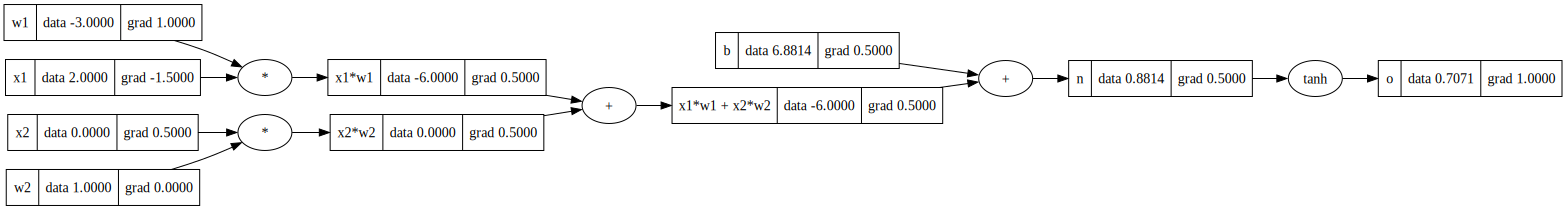

In [125]:
draw_dot(o)

In [126]:
o = build_graph()

In [127]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo


[Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [128]:
o.grad = 1.0


In [129]:
for node in reversed(topo):
    node._backward()

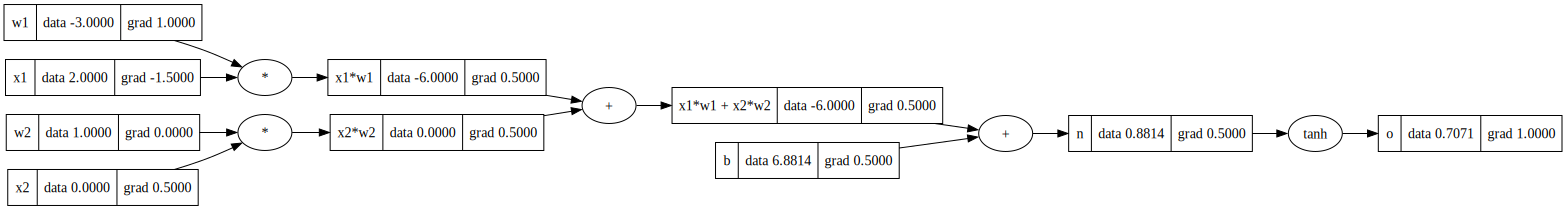

In [130]:
draw_dot(o)

In [131]:
o = build_graph()

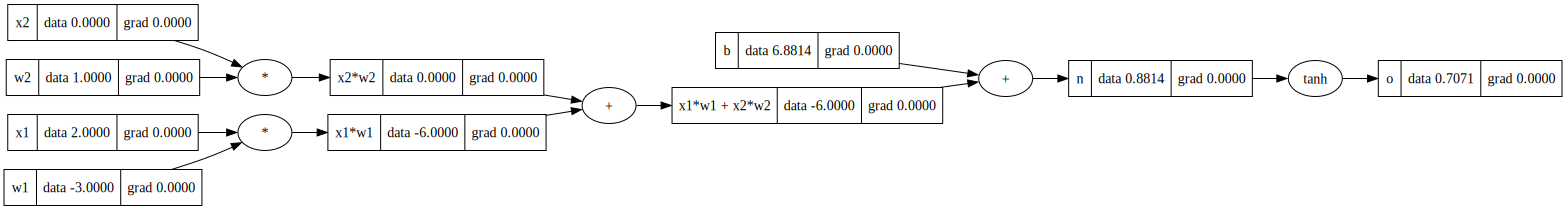

In [132]:
draw_dot(o)

In [133]:
o.backward()

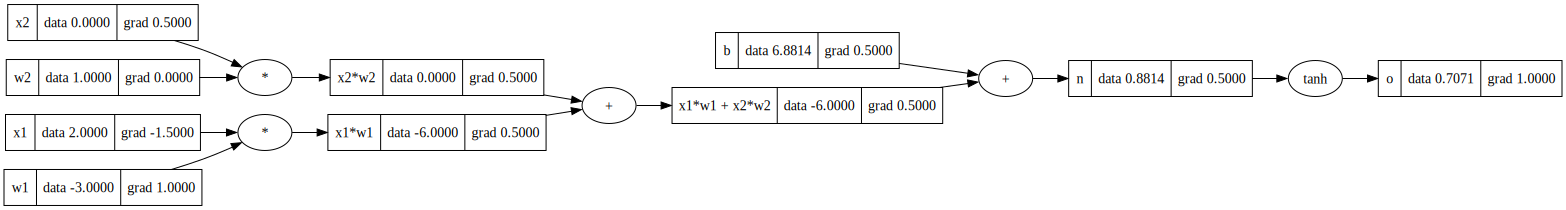

In [134]:
draw_dot(o)

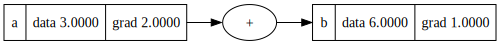

In [135]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

In [136]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b

x1w1 = x1*w1
x1w1.label = 'x1*w1'
x2w2 = x2*w2
x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b
n.label = 'n'
# o = n.tanh()
e = (2*n).exp(); e.label = 'e' 
o = (e-1) / (e+1)
o.label = 'o'
o.backward()

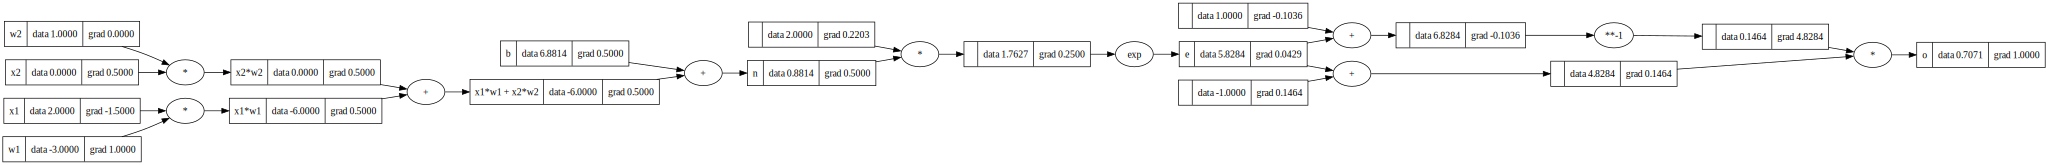

In [137]:
draw_dot(o)

In [138]:
import torch

In [139]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
-----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [140]:
import random


class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
    
    def __call__(self, x):
        act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]
    
x = [2.0, 3.0]
n = Neuron(len(x))
n(x)

Value(data=-0.9974499198361764)

In [141]:
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
x = [2.0, 3.0]
l = Layer(len(x), 4)
l(x)

[Value(data=0.47819616784118346),
 Value(data=-0.9748093453799562),
 Value(data=0.5102445825200714),
 Value(data=-0.9685359391535384)]

In [142]:
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [143]:
x = [2.0, 3.0, -1.0]
nn = MLP(len(x), [4, 4, 1])
res = nn(x)
res

Value(data=-0.3781105305683274)

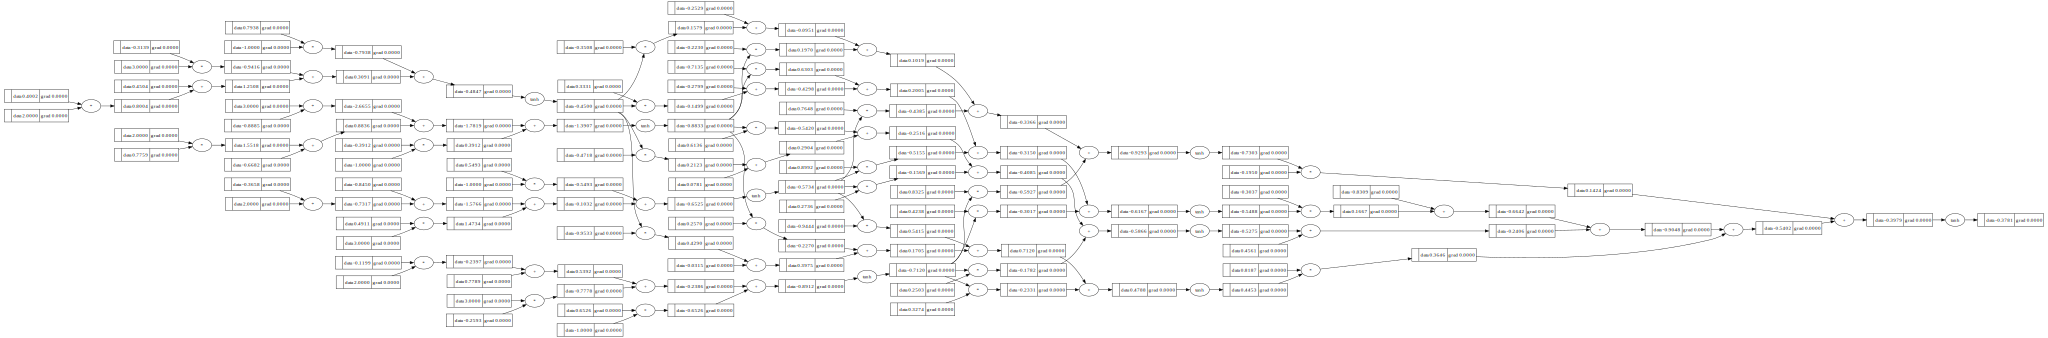

In [144]:
draw_dot(res)

In [145]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
nn = MLP(len(xs[0]), [4, 4, 1])
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [nn(x) for x in xs]
ypred

[Value(data=0.8650012016665681),
 Value(data=0.4218143177215255),
 Value(data=0.7098674703528361),
 Value(data=0.8035717975584468)]

In [146]:
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=4.983786758963154)

In [147]:
loss.backward()

In [148]:
nn.layers[0].neurons[0].w[0].grad

-0.625381822328378

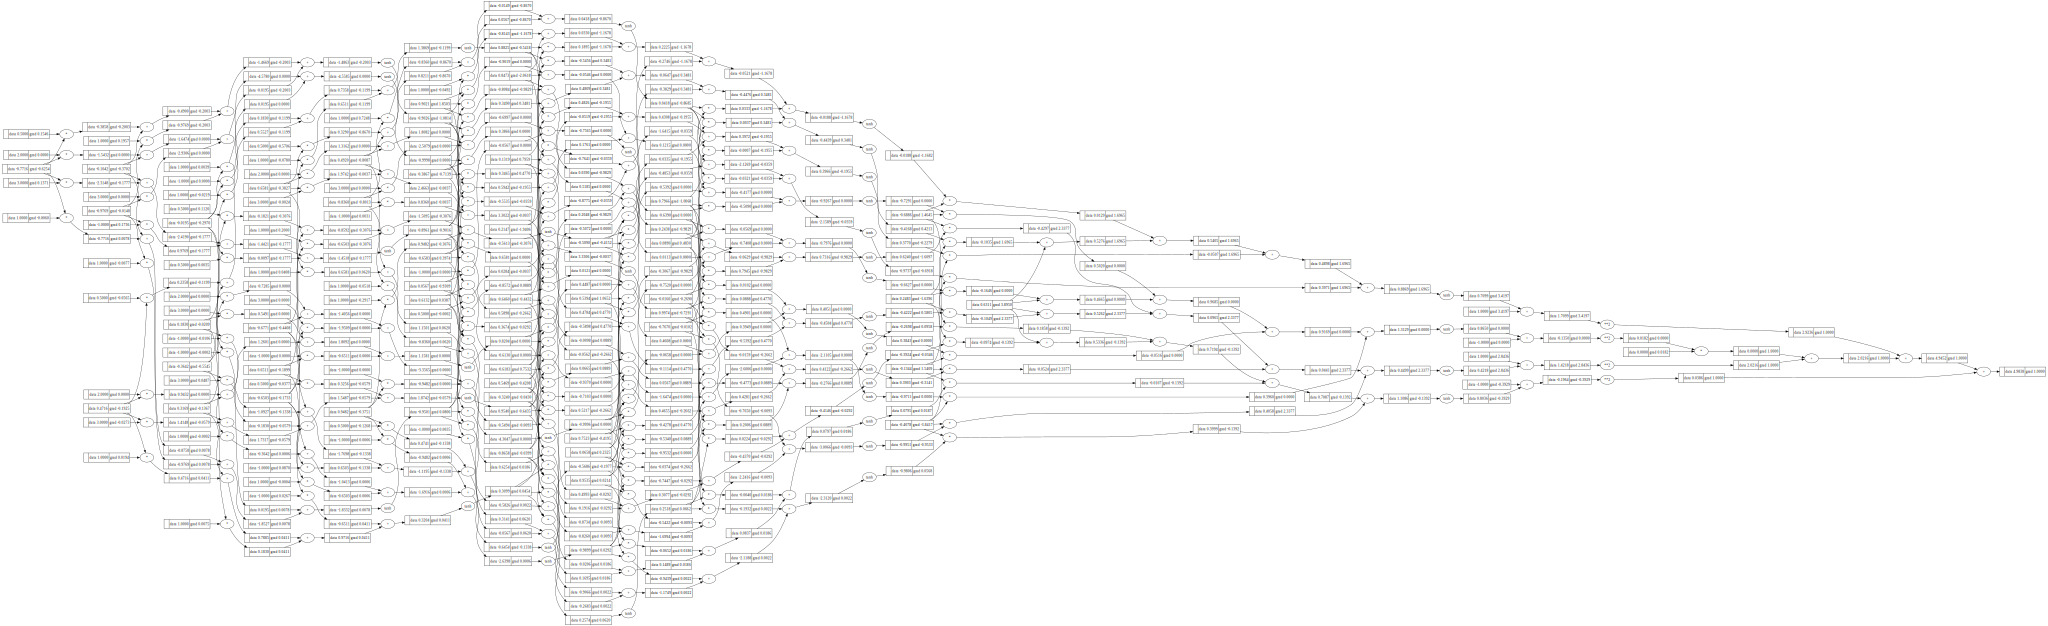

In [149]:
draw_dot(loss)

In [150]:
nn.parameters()

[Value(data=-0.7715952782566979),
 Value(data=-0.976880006475549),
 Value(data=-0.019474182877690982),
 Value(data=-0.10418949171092784),
 Value(data=0.47159502695122835),
 Value(data=0.1830441604776143),
 Value(data=0.6511174788883178),
 Value(data=0.3169148623845608),
 Value(data=-0.3642420391502368),
 Value(data=-0.6503083795031883),
 Value(data=0.9481729218443942),
 Value(data=-0.6770897521052932),
 Value(data=0.6580787828123977),
 Value(data=-0.8359676443258905),
 Value(data=0.05674276269815581),
 Value(data=0.4920176900267075),
 Value(data=-0.38668133668884574),
 Value(data=-0.6182648668693334),
 Value(data=0.7523177657739337),
 Value(data=0.08898470645863088),
 Value(data=0.1319059374871021),
 Value(data=0.9021377632717031),
 Value(data=0.21469062402646055),
 Value(data=0.5394260078723039),
 Value(data=0.7965530506985166),
 Value(data=0.8473220050208994),
 Value(data=-0.6582599460471923),
 Value(data=0.5468874581121983),
 Value(data=0.06584777720542223),
 Value(data=-0.015963058

In [151]:
len(nn.parameters())

41

In [152]:
nn.layers[0].neurons[0].w[0].grad

-0.625381822328378

In [153]:
nn.layers[0].neurons[0].w[0].data

-0.7715952782566979

In [154]:
for p in nn.parameters():
    p.data -= 0.01 * p.grad

In [155]:
nn.layers[0].neurons[0].w[0].grad

-0.625381822328378

In [156]:
nn.layers[0].neurons[0].w[0].data

-0.7653414600334142

In [157]:
ypred = [nn(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
loss.backward()
loss

Value(data=4.3894311180481)

In [158]:
for p in nn.parameters():
    p.data -= 0.01 * p.grad
ypred = [nn(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
for p in nn.parameters():
    p.grad = 0.0
loss.backward()
loss

Value(data=3.1131803848333246)

In [159]:
ys

[1.0, -1.0, -1.0, 1.0]

In [160]:
ypred

[Value(data=0.7404478591361656),
 Value(data=0.02585289118857584),
 Value(data=0.3790630304972885),
 Value(data=0.6012627577100438)]

In [163]:
for k in range(20):
    # forward pass
    ypred = [nn(x) for x in xs]
    loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])

    # backward pass
    for p in nn.parameters():
        p.grad = 0.0
    loss.backward()

    # update
    for p in nn.parameters():
        p.data -= 0.05 * p.grad

    print(k, loss.data)

0 0.04346217135052098
1 0.04088297099482485
2 0.03857719935418516
3 0.036504527191129524
4 0.03463208143806793
5 0.03293281346196539
6 0.03138427505016991
7 0.02996768862911839
8 0.02866723279536299
9 0.027469487437932108
10 0.026362998557074524
11 0.02533793384420016
12 0.02438580778409463
13 0.023499260515341923
14 0.022671878626647855
15 0.02189804893672965
16 0.021172838417079988
17 0.020491894985932957
18 0.019851365078389055
19 0.019247824787710498


In [164]:
ypred

[Value(data=0.9240550730483983),
 Value(data=-0.9451238998559861),
 Value(data=-0.9092768653214472),
 Value(data=0.9105251361845583)]